<a href="https://colab.research.google.com/github/esfandiaryfard/machine-learning/blob/main/ExerciseSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# Add Dimention to Tensor

In [2]:
y = torch.ones(2, 3)
y.shape

torch.Size([2, 3])

In [3]:
y_unsqueezed = y.unsqueeze(dim = 0)
y_unsqueezed.shape # 3D tensor

torch.Size([1, 2, 3])

In [4]:
y_unsqueezed = y.unsqueeze(dim = 1)
y_unsqueezed.shape # 3D tensor

torch.Size([2, 1, 3])

# And Logic

In [5]:
# create dataset
num_samples = 5000
data = torch.randint(low = 0, high = 2, size = (num_samples, 2), dtype=torch.float32 )

In [ ]:
data.shape

torch.Size([5000, 2])

In [13]:
labels = (data.sum(dim=1)==2).to(torch.float32)
labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [14]:
for i in range(10):
  print(f"x:{data[i]}, label:{labels[i]}")

x:tensor([1., 0.]), label:0.0
x:tensor([1., 0.]), label:0.0
x:tensor([0., 1.]), label:0.0
x:tensor([0., 1.]), label:0.0
x:tensor([1., 1.]), label:1.0
x:tensor([0., 0.]), label:0.0
x:tensor([1., 1.]), label:1.0
x:tensor([1., 1.]), label:1.0
x:tensor([1., 1.]), label:1.0
x:tensor([1., 1.]), label:1.0


In [ ]:
data +=0.1*torch.randn(data.shape)

In [ ]:
for i in range(10):
  print(f"x:{data[i]}, label:{labels[i]}")

x:tensor([0.9946, 0.9882]), label:1.0
x:tensor([ 0.9769, -0.1013]), label:0.0
x:tensor([ 0.9913, -0.0576]), label:0.0
x:tensor([0.9848, 1.1448]), label:1.0
x:tensor([-0.1394, -0.0277]), label:0.0
x:tensor([0.8374, 0.8051]), label:1.0
x:tensor([-0.1016,  1.0067]), label:0.0
x:tensor([1.0026, 1.0679]), label:1.0
x:tensor([1.0138, 0.1531]), label:0.0
x:tensor([0.7459, 0.8227]), label:1.0


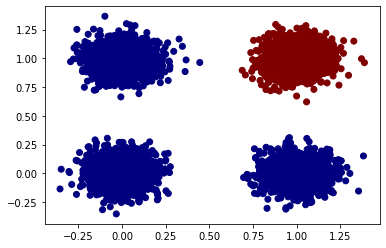

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c = labels, cmap = "jet")
plt.show()

In [ ]:
def generate_and_dataset(num_samples = 5000):
  data = torch.randint(low = 0 , high = 2, size=(num_samples,2), dtype=torch.float32)
  labels = (data.sum(dim=1) == 2).to(torch.float32)
  data += 0.1 * torch.randn(data.shape)
  return data, labels

In [ ]:
from torch.utils.data import Dataset
class ANDDataset(Dataset):
  def __init__(self, num_samples = 5000):
    super().__init__()
    self.size = num_samples
    self.data, self.labels = generate_and_dataset(self.size)
  
  def __len__(self):
    return self.size
  
  def __getitem__(self, idx):
    data_point = self.data[idx]
    data_label = self.labels[idx]
    return data_point, data_label 

In [ ]:
and_dataset = ANDDataset(num_samples=5000)
len(and_dataset)

5000

In [ ]:
point, label = and_dataset[0]
print("Point:", point)
print("Label:", label)

Point: tensor([ 1.0673, -0.0357])
Label: tensor(0.)


In [ ]:
from torch.utils.data import DataLoader

dset_train = ANDDataset(num_samples=5000)
dset_test = ANDDataset(num_samples=500)

dloader_train = DataLoader(dset_train, batch_size = 50, shuffle=True)
dloader_test = DataLoader(dset_test, batch_size = 50)

In [ ]:
batch = next(iter(dloader_train))
points, label = batch
points

tensor([[ 1.0161,  0.0587],
        [ 0.0938, -0.1407],
        [ 0.1428,  1.1061],
        [ 0.8236,  0.1152],
        [-0.0565,  1.0059],
        [ 0.9572,  0.8672],
        [ 0.0521, -0.0762],
        [ 1.2242,  0.0358],
        [-0.0089, -0.1743],
        [ 0.8249,  1.1059],
        [-0.0031,  1.1601],
        [ 1.0028,  0.9813],
        [ 0.0142,  0.0490],
        [ 1.1153,  0.9684],
        [-0.0459, -0.0549],
        [ 0.9810,  0.0820],
        [-0.0766, -0.1179],
        [ 1.0107, -0.1457],
        [ 1.0580, -0.0112],
        [ 0.8734,  1.0887],
        [ 1.0359, -0.0723],
        [ 1.0592,  0.0506],
        [-0.0069,  0.9069],
        [ 1.1664, -0.0339],
        [ 1.1159,  0.8493],
        [ 1.0075,  0.1358],
        [ 0.9778,  0.0156],
        [ 0.7763,  0.1836],
        [ 0.8093,  0.0172],
        [ 1.0762, -0.0419],
        [-0.1108, -0.0153],
        [ 0.9954,  0.9323],
        [ 0.8972,  0.9933],
        [ 0.0043,  0.9772],
        [ 0.7504,  1.0706],
        [ 0.0173, -0

In [ ]:
labels

tensor([1., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
points.shape

torch.Size([50, 2])

In [ ]:
labels.shape

torch.Size([5000])

In [ ]:
from tqdm import tqdm
import time

for idx, batch in enumerate(tqdm(dloader_train)):
  time.sleep(0.1) 

100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


In [ ]:
import torch.nn as nn 
import torch.nn.functional as F
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return x

In [ ]:
class SimpleModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(SimpleModel, self).__init__()
    self.layer1 = torch.nn.Linear(in_features=input_dim, out_features=output_dim)  
  def forward(self, x):
    output = self.layer1(x) # Computes sum(w*x + b)
    return output 

In [ ]:
net = SimpleModel(input_dim = 2, output_dim = 1)
net

SimpleModel(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
criterion

BCEWithLogitsLoss()

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs = 100):
    history_loss = []
    
    model.train()
    for epoch in range(num_epochs):
        sum_loss = 0
      
        for data_inputs, data_labels in data_loader:
            preds = model(data_inputs) 
            preds = preds.squeeze(dim=1) 
            
            loss = loss_module(preds, data_labels)
            
            sum_loss += loss.item()
            
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
             
        epoch_loss = sum_loss / len(data_loader)
        
        history_loss.append(epoch_loss)
        
        print(f"Epoch {epoch+1}: TrL= {epoch_loss}")
        
    plt.title("Loss")
    plt.plot(history_loss, label="train")
    plt.legend()
    plt.show()



Epoch 1: TrL= 0.6814174050092697
Epoch 2: TrL= 0.653821827173233
Epoch 3: TrL= 0.6285321205854416
Epoch 4: TrL= 0.6052041524648666
Epoch 5: TrL= 0.5836129885911941
Epoch 6: TrL= 0.563568648993969
Epoch 7: TrL= 0.5448930951952934
Epoch 8: TrL= 0.5274993601441383
Epoch 9: TrL= 0.5112611153721809
Epoch 10: TrL= 0.49608590006828307
Epoch 11: TrL= 0.4818771731853485
Epoch 12: TrL= 0.4685484257340431
Epoch 13: TrL= 0.4560381680727005
Epoch 14: TrL= 0.44427767604589463
Epoch 15: TrL= 0.43318275928497313
Epoch 16: TrL= 0.42271762669086455
Epoch 17: TrL= 0.41282984375953674
Epoch 18: TrL= 0.4034819793701172
Epoch 19: TrL= 0.39460687279701234
Epoch 20: TrL= 0.3861926108598709
Epoch 21: TrL= 0.37819510191679
Epoch 22: TrL= 0.3705837163329124
Epoch 23: TrL= 0.36332203418016434
Epoch 24: TrL= 0.3564062437415123
Epoch 25: TrL= 0.34979357808828354
Epoch 26: TrL= 0.34346403539180753
Epoch 27: TrL= 0.3374044480919838
Epoch 28: TrL= 0.33160839408636095
Epoch 29: TrL= 0.32602925777435304
Epoch 30: TrL= 0

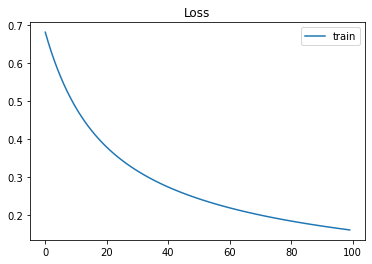

In [ ]:
train_model(net, optimizer, dloader_train, criterion)

In [ ]:
def eval_model(model, data_loader):
    model.eval() 
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): 
        for data_inputs, data_labels in data_loader:

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) 
            pred_labels = (preds >= 0.5).long() 
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print("Accuracy of the model: %4.2f%%" % (100.0*acc))

In [ ]:
eval_model(net, dloader_test)

Accuracy of the model: 100.00%
